# Machine Learning: Project 2
## Task 2

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,homogeneity_score,completeness_score,v_measure_score

In [3]:
X_train = pd.read_csv("./datasets/task2/14cancer_xtrain.csv", header=None)
Y_train = pd.read_csv("./datasets/task2/14cancer_ytrain.csv", header=None)

X_test = pd.read_csv("./datasets/task2/14cancer_xtest.csv", header=None)
Y_test = pd.read_csv("./datasets/task2/14cancer_ytest.csv", header=None)

X_train = X_train.transpose()
Y_train = np.ravel(Y_train.transpose())

X_test = X_test.transpose()
Y_test = np.ravel(Y_test.transpose())

### PCA usage
- The best accuracy at PCA componenets 110 and 122 =0.703
- According to the numbers and plot below n_components = 110 for the PCA provided the best combination between training and test scores. It can also be seen that the classifier tends to overfit the data at n_components ={115,125} with a perfect training score while taking a significant hit in the test accuracy.
- For more dimensions the over-fitting is clearly visible - performance on the training set stays the same, while for the test set adding more information actually makes the classifier worse (In our case).
- PCA is not aware of the labels in the training set, it just throws away some information which may be noise or useful sometimes.
- in the sklearn implementation we use one versus rest (OVR) implementation for SVM.


In [6]:
train_scores = []
test_scores = []

param_grid = {'C': [0.1,1e0, 1e1, 1e2, 1e3],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,0.5,1]}
clf = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
for n_components in range(90, 126, 5):
    pca = PCA(n_components=n_components, svd_solver='full', whiten=True).fit(X_train)
    eigenvalues = pca.components_.reshape(n_components, X_train.shape[1])

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf.fit(X_train_pca, Y_train)
    print("training score:", n_components, ":", clf.score(X_train_pca,Y_train))
    print("test score:", clf.score(X_test_pca,Y_test))
    test_scores.append(clf.score(X_test_pca, Y_test))
    train_scores.append(clf.score(X_train_pca, Y_train))
    print("")

training score: 90 : 0.9236111111111112
test score: 0.5370370370370371

training score: 95 : 0.9791666666666666
test score: 0.6481481481481481

training score: 100 : 0.9791666666666666
test score: 0.6666666666666666

training score: 105 : 0.9722222222222222
test score: 0.6666666666666666

training score: 110 : 0.9722222222222222
test score: 0.7037037037037037

training score: 115 : 1.0
test score: 0.6296296296296297

training score: 120 : 0.9861111111111112
test score: 0.5740740740740741

training score: 125 : 1.0
test score: 0.5740740740740741



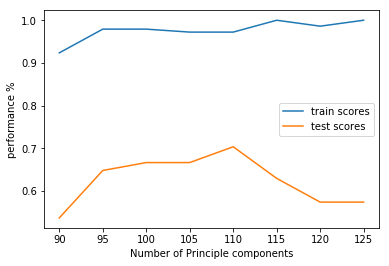

In [10]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of Principle components')

ax1.set_ylabel('performance %')
line1 = ax1.plot([ n_components for n_components in range(90, 126, 5)],train_scores,label = "train scores")
line2 = ax1.plot([ n_components for n_components in range(90, 126, 5)],test_scores,label ="test scores")
ax1.legend()
plt.show()

### (Bonus) heirarical clustering
- The Homogenity score evaluate each cluster contains only members of a single class, the is shown score shown below.
- The completeness score measures whether all members of a given class are assigned to the same cluster.
- The scores obtained below shows a harmonic mean for completenees and homegenity with a score of 0.6.
- We did the classification on the whole data altogether and the train and test data two (results are  shown below).
- Also, PCA does not improve the results.

In [11]:
from sklearn.cluster import AgglomerativeClustering

def evaluate(Y_test,pred_test):
    print("Homogenity score: ",homogeneity_score(Y_test, pred_test))
    print("completeness score: ",completeness_score(Y_test, pred_test))
    print("harmonic mean score: ",v_measure_score(Y_test, pred_test))
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  

###  Classification on the whole dataset

In [12]:
All_data_X = np.concatenate((X_train, X_test), axis=0)
All_data_Y = np.concatenate((Y_train, Y_test), axis=0)

pred_all = cluster.fit_predict(All_data_X)
print(All_data_X.shape,All_data_Y.shape)

(198, 16063) (198,)


In [13]:
evaluate(All_data_Y,pred_all)

Homogenity score:  0.4359811977380588
completeness score:  0.5055857050734917
harmonic mean score:  0.4682107253323854


### classification using training and test data (just for fun)

In [14]:
pred_train = cluster.fit_predict(X_train)
pred_test = cluster.fit_predict(X_test)
print("Train data")
evaluate(Y_train,pred_train)
print("Test data")
evaluate(Y_test,pred_test)

Train data
Homogenity score:  0.5239153465174028
completeness score:  0.573926300798684
harmonic mean score:  0.5477817269794655
Test data
Homogenity score:  0.5574163867446181
completeness score:  0.6486439690180107
harmonic mean score:  0.5995799062064006


### PCA (for fun too)

In [15]:
#using PCA does not improve the results
n_components = 110
pca = PCA(n_components=n_components, svd_solver='full', whiten=True).fit(X_train)
All_data_X = pca.transform(All_data_X)